In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

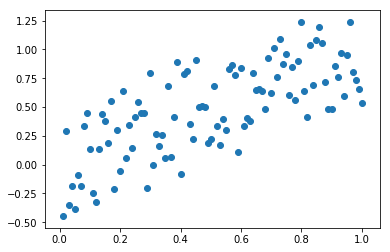

In [33]:
n = 100
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5


plt.scatter(x,y)

In [34]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
model.coef_, model.intercept_

(array([ 0.96603307]), -0.0078174034934240244)

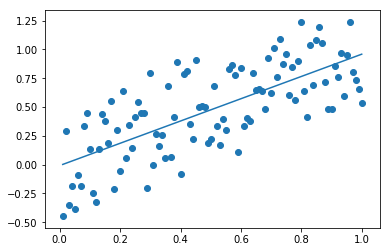

In [36]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## How do we "test" this model on "new" data if we don't have a new dataset?

### Instead of using all of our data to produce this model, let's use some, and save the rest as a reserve 

In [37]:
model = LinearRegression()
model.fit(x[:50], y[:50])
model.coef_, model.intercept_

(array([ 1.25363638]), -0.078381488151647333)

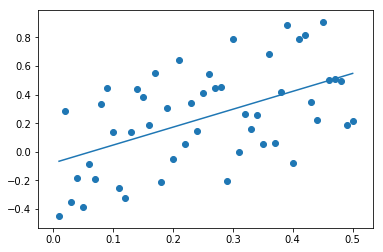

In [38]:
plt.scatter(x[:50],y[:50])
plt.plot(x[:50], np.dot(x[:50], model.coef_) + model.intercept_)

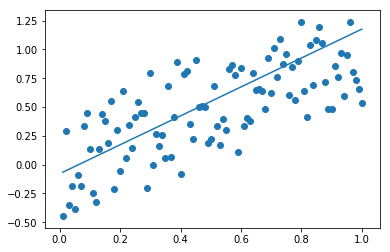

In [39]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## Our slope doesn't match the previous slope with all the data. Why not? 
## Let's plot all of our data with this model to see

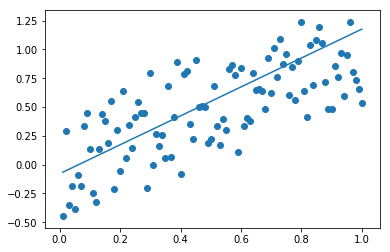

In [40]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## We only used the first half of our data and neglected the second half. 

### Let's try this again differently. Let's shuffle our data first

In [41]:
def shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return p

In [42]:
p = shuffle(x, y)

In [43]:
p

array([61, 27, 92, 68, 22, 73, 97, 88, 18, 41, 40, 62, 14, 71, 25, 48, 43,
       30, 33, 58, 36, 23, 75, 66, 59, 83, 28, 55, 53,  3, 78, 32,  6, 46,
       12, 64, 60, 35, 16, 77, 29, 11, 42, 84, 38, 76, 96,  2,  9, 95, 98,
       34, 39, 10, 81, 56, 87, 19, 54, 26, 44, 93, 74, 24, 79, 31, 63, 17,
       82, 15, 69, 57, 72, 49, 80, 86, 70, 90, 20, 65,  1, 45, 50, 51, 13,
       67, 47, 37, 85, 91,  8, 52,  5,  0, 94, 89, 21,  7, 99,  4])

In [44]:
x[[2, 0, 1, 4]]

array([[ 0.03],
       [ 0.01],
       [ 0.02],
       [ 0.05]])

In [46]:
x[[61, 27, 92]], y[[61, 27, 92]]

(array([[ 0.62],
        [ 0.28],
        [ 0.93]]), array([ 0.40425358,  0.45026859,  0.96477856]))

In [47]:
x[p], y[p]

(array([[ 0.62],
        [ 0.28],
        [ 0.93],
        [ 0.69],
        [ 0.23],
        [ 0.74],
        [ 0.98],
        [ 0.89],
        [ 0.19],
        [ 0.42],
        [ 0.41],
        [ 0.63],
        [ 0.15],
        [ 0.72],
        [ 0.26],
        [ 0.49],
        [ 0.44],
        [ 0.31],
        [ 0.34],
        [ 0.59],
        [ 0.37],
        [ 0.24],
        [ 0.76],
        [ 0.67],
        [ 0.6 ],
        [ 0.84],
        [ 0.29],
        [ 0.56],
        [ 0.54],
        [ 0.04],
        [ 0.79],
        [ 0.33],
        [ 0.07],
        [ 0.47],
        [ 0.13],
        [ 0.65],
        [ 0.61],
        [ 0.36],
        [ 0.17],
        [ 0.78],
        [ 0.3 ],
        [ 0.12],
        [ 0.43],
        [ 0.85],
        [ 0.39],
        [ 0.77],
        [ 0.97],
        [ 0.03],
        [ 0.1 ],
        [ 0.96],
        [ 0.99],
        [ 0.35],
        [ 0.4 ],
        [ 0.11],
        [ 0.82],
        [ 0.57],
        [ 0.88],
        [ 0.2 ],
        [ 0.55

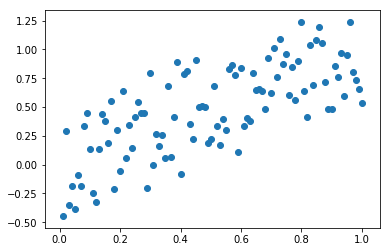

In [48]:
plt.scatter(x[p],y[p])

### Still plots the same scatter plot

### So, let's use the first 50 points of the shuffled data instead and see if the model is similar 

In [49]:
model = LinearRegression()
model.fit(x[p][:50], y[p][:50])
model.coef_, model.intercept_


(array([ 0.98196171]), -0.010870046002644351)

### Success! We got a similar slope as before with half of the points 

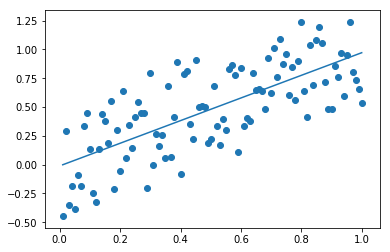

In [50]:

plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

###  So how do we check the validity of the model on the rest of the points? The loss (Error) function of course!
### $E = \Sigma err(y - \hat{y}) = \Sigma err(y - \beta \cdot x)$

### $E = \frac{1}{N}\Sigma err( y - \hat{y}) = \frac{1}{N}\Sigma err(y - \beta \cdot x)$
### Why divide by N? 
This way we have a _mean_ error that's invariant to the number of points you use to build your model. Otherwise, your error would increase with the number of points

In [52]:
x[50:]

array([[ 0.51],
       [ 0.52],
       [ 0.53],
       [ 0.54],
       [ 0.55],
       [ 0.56],
       [ 0.57],
       [ 0.58],
       [ 0.59],
       [ 0.6 ],
       [ 0.61],
       [ 0.62],
       [ 0.63],
       [ 0.64],
       [ 0.65],
       [ 0.66],
       [ 0.67],
       [ 0.68],
       [ 0.69],
       [ 0.7 ],
       [ 0.71],
       [ 0.72],
       [ 0.73],
       [ 0.74],
       [ 0.75],
       [ 0.76],
       [ 0.77],
       [ 0.78],
       [ 0.79],
       [ 0.8 ],
       [ 0.81],
       [ 0.82],
       [ 0.83],
       [ 0.84],
       [ 0.85],
       [ 0.86],
       [ 0.87],
       [ 0.88],
       [ 0.89],
       [ 0.9 ],
       [ 0.91],
       [ 0.92],
       [ 0.93],
       [ 0.94],
       [ 0.95],
       [ 0.96],
       [ 0.97],
       [ 0.98],
       [ 0.99],
       [ 1.  ]])

In [51]:
np.dot(x[50:], model.coef_) + model.intercept_

array([ 0.48993043,  0.49975004,  0.50956966,  0.51938928,  0.52920889,
        0.53902851,  0.54884813,  0.55866775,  0.56848736,  0.57830698,
        0.5881266 ,  0.59794621,  0.60776583,  0.61758545,  0.62740507,
        0.63722468,  0.6470443 ,  0.65686392,  0.66668353,  0.67650315,
        0.68632277,  0.69614239,  0.705962  ,  0.71578162,  0.72560124,
        0.73542085,  0.74524047,  0.75506009,  0.76487971,  0.77469932,
        0.78451894,  0.79433856,  0.80415817,  0.81397779,  0.82379741,
        0.83361702,  0.84343664,  0.85325626,  0.86307588,  0.87289549,
        0.88271511,  0.89253473,  0.90235434,  0.91217396,  0.92199358,
        0.9318132 ,  0.94163281,  0.95145243,  0.96127205,  0.97109166])

In [53]:
y[50:] - (np.dot(x[50:], model.coef_) + model.intercept_)

array([ 0.19261653, -0.16031614, -0.33791644, -0.12148431, -0.22998924,
        0.29130786,  0.31980442,  0.2211275 , -0.46216532,  0.2625585 ,
       -0.25658725, -0.19369263, -0.23046511,  0.18147208,  0.01718603,
        0.01999751, -0.00559431, -0.17497673,  0.25666823, -0.05532248,
        0.32786613,  0.06768897,  0.3832    ,  0.15462971,  0.23775027,
       -0.13476111,  0.09907278, -0.19456516,  0.13648098,  0.46122714,
       -0.14350629, -0.37943318,  0.23366662, -0.12307479,  0.2614342 ,
        0.36143925,  0.21240424, -0.13798553, -0.37602985, -0.38939267,
       -0.02727681, -0.13132977,  0.06242422, -0.31910053,  0.02647942,
        0.30715083, -0.13502809, -0.21748276, -0.30891248, -0.43667655])

In [54]:
np.square(y[50:] - (np.dot(x[50:], model.coef_) + model.intercept_))

array([  3.71011267e-02,   2.57012645e-02,   1.14187518e-01,
         1.47584375e-02,   5.28950492e-02,   8.48602697e-02,
         1.02274868e-01,   4.88973730e-02,   2.13596779e-01,
         6.89369685e-02,   6.58370170e-02,   3.75168358e-02,
         5.31141684e-02,   3.29321147e-02,   2.95359470e-04,
         3.99900257e-04,   3.12963503e-05,   3.06168551e-02,
         6.58785783e-02,   3.06057655e-03,   1.07496200e-01,
         4.58179733e-03,   1.46842238e-01,   2.39103463e-02,
         5.65251912e-02,   1.81605576e-02,   9.81541564e-03,
         3.78555998e-02,   1.86270569e-02,   2.12730479e-01,
         2.05940543e-02,   1.43969535e-01,   5.46000900e-02,
         1.51474043e-02,   6.83478400e-02,   1.30638334e-01,
         4.51155617e-02,   1.90400078e-02,   1.41398449e-01,
         1.51626653e-01,   7.44024534e-04,   1.72475083e-02,
         3.89678310e-03,   1.01825151e-01,   7.01159541e-04,
         9.43416315e-02,   1.82325848e-02,   4.72987519e-02,
         9.54269233e-02,

In [55]:
np.sum(np.square(y[50:] - (np.dot(x[50:], model.coef_) + model.intercept_)))

3.0503160919839005

In [59]:
np.sum(np.square(y[p][50:] - (np.dot(x[p][50:], model.coef_) + model.intercept_)))/50

0.078545133436026718

### Is there a shorter way of calculating this error?
Why yes, of course! Scikit-Learn to the rescue

In [22]:
from sklearn.metrics import mean_squared_error

In [58]:
mean_squared_error(y[p][50:], np.dot(x[p][50:], model.coef_) + model.intercept_)

0.078545133436026718

### Why the slight discrepancy in values? 
Let's check the Documentation
[http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error]

Turns out sklearn sums N-1 values and not all N because Statistics
[http://stats.stackexchange.com/questions/17890/what-is-the-difference-between-n-and-n-1-in-calculating-population-variance]

## Is there an easier way to shuffle the data?
I'm glad you asked [http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [67]:
from sklearn.linear_model import Ridge

In [68]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([ 0.8560574]), 0.05491858960427376)

In [62]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([ 1.0369989]), -0.035769290071601068)

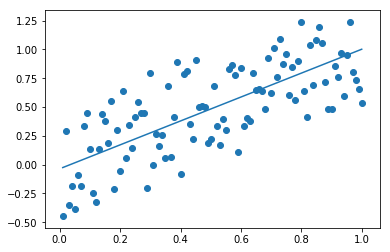

In [63]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

In [65]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.071388325611252718

In [64]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.076702444866570241

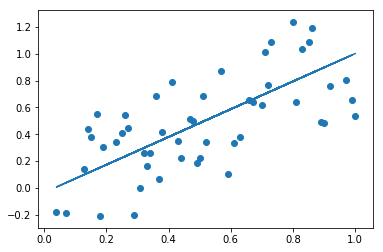

In [66]:
plt.scatter(x_test,y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_)

## Ridge 

In [69]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.069445955321577324

In [70]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.079800371048118851